In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import pandas as pd
import numpy as np

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

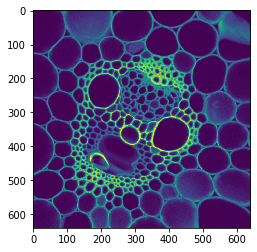

In [2]:
#maize_clsm.tif was taken from
#https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/sampleImages/maize_clsm.tif
#Licensed by David Legland under CC-BY 4.0 license
#https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE   
image = cle.push(imread('maize_clsm.tif'))

cle.imshow(image)

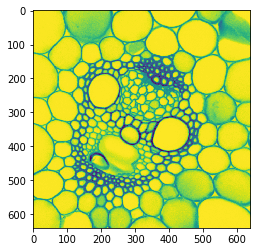

In [3]:
inverted = cle.subtract_image_from_scalar(image, scalar=256)
cle.imshow(inverted)

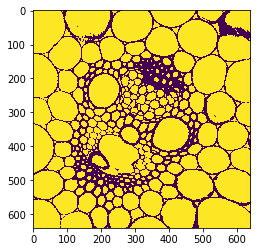

In [4]:
binary = cle.threshold_otsu(inverted)

cle.imshow(binary)

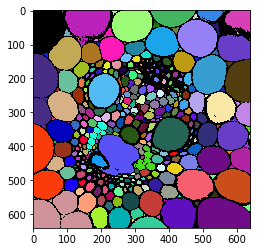

In [5]:
labels = cle.connected_components_labeling_box(binary)

cle.imshow(labels, labels=True)

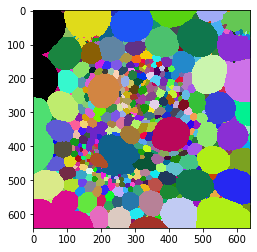

In [6]:
extended_labels = cle.extend_labeling_via_voronoi(labels)

cle.imshow(extended_labels, labels=True)

In [7]:
imsave("maize_clsm_labels.tif", np.asarray(extended_labels))

<ipython-input-7-0adffe4d6085>:1: UserWarning: maize_clsm_labels.tif is a low contrast image
  imsave("maize_clsm_labels.tif", np.asarray(extended_labels))


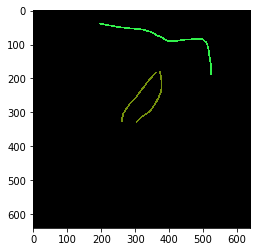

In [8]:
annotation = cle.push(imread('maize_clsm_annotation.tif'))

cle.imshow(annotation, labels=True)

In [9]:
from oclrfc import OCLRandomForestLabelClassifier

features = 'area,touching_neighbor_count,average_distance_of_touching_neighbors,average_distance_of_n_nearest_neighbors=1,average_distance_of_n_nearest_neighbors=6,average_distance_of_n_nearest_neighbors=10'

classifier = OCLRandomForestLabelClassifier("maize_clsm.model.cl")
classifier.train(features, extended_labels, annotation, image)

c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:168: RuntimeWarning: overflow encountered in subtract
  bbox_max_y - bbox_min_y + 1,
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:169: RuntimeWarning: overflow encountered in subtract
  bbox_max_x - bbox_min_x + 1,
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:180: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_width'] = bbox_max_x - bbox_min_x + 1
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:181: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_height'] = bbox_max_y - bbox_min_y + 1
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:182: RuntimeWarning: overflow encountered in subtract

c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:168: RuntimeWarning: overflow encountered in subtract
  bbox_max_y - bbox_min_y + 1,
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:169: RuntimeWarning: overflow encountered in subtract
  bbox_max_x - bbox_min_x + 1,
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:180: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_width'] = bbox_max_x - bbox_min_x + 1
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:181: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_height'] = bbox_max_y - bbox_min_y + 1
c:\structure\code\tl_pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:182: RuntimeWarning: overflow encountered in subtract

2.0
1.0


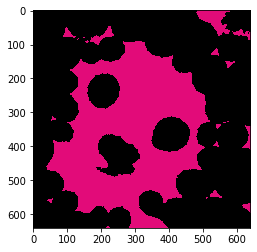

In [10]:
# this line is not necessary in this particular example:
classifier = OCLRandomForestLabelClassifier("maize_clsm.model.cl")


result = classifier.predict(extended_labels, image)

print(result.max())
print(result.min())

cle.imshow(result, labels=True)

In [ ]:
!napari